In [31]:
import pandas as pd
import camelot

In [32]:
pdf_path = r"listaClienti (1).pdf"

In [33]:
tables = camelot.read_pdf(pdf_path, pages="all", flavor="stream")
tables

<TableList n=7>

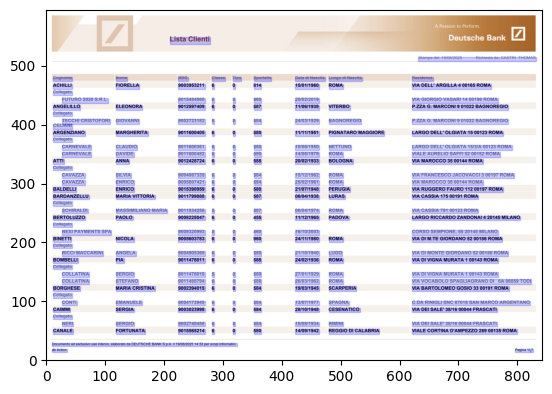

In [34]:
camelot.plot(tables[0], kind="text", filename="page1_text.png")

In [35]:
tables[0]


<Table shape=(38, 9)>

In [36]:
tables[0].parsing_report


{'accuracy': 100.0, 'whitespace': 29.24, 'order': 1, 'page': 1}

In [77]:
areas_p1 = ["5,505,835,35"]
areas = ["5,550,835,35"]
tables_p1 = camelot.read_pdf(
    pdf_path, pages="1", flavor="stream",
    table_areas=areas_p1, 
    # strip_text="\n"
)
tables_rest = camelot.read_pdf(
    pdf_path, pages="2-end", flavor="stream",
    table_areas=areas,
)
tables = camelot.core.TableList(list(tables_p1) + list(tables_rest))

C:\Users\thoma\AppData\Local\Temp\ipykernel_24136\145415022.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[1], kind='contour').show()


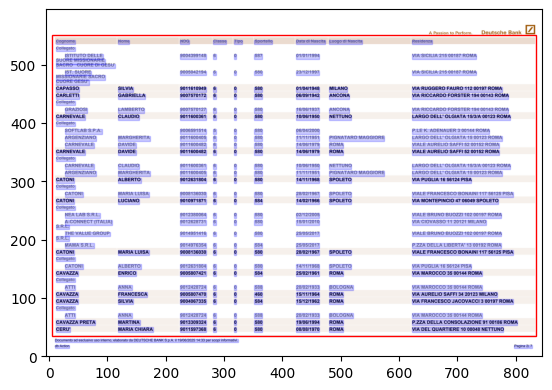

In [78]:
camelot.plot(tables[1], kind='contour').show()

In [81]:
import os
all_tables = []
for t in range(len(tables)):
    df = tables[t].df.copy()
    df.columns = df.iloc[0]
    df = df.iloc[1:].reset_index(drop=True)
    df['source_file'] = os.path.basename(pdf_path)
    df['page_number'] = tables[t].page
    all_tables.append(df)
merged_df = pd.concat(all_tables, ignore_index=True)
display(merged_df)

,Cognome,Nome,NDG,Classe,Tipo,Sportello,Data di Nascita,Luogo di Nascita,Residenza,source_file,page_number
0,ACHILLI,FIORELLA,9003953211,6,0,814,15/01/1960,ROMA,VIA DELL' ARGILLA 4 00165 ROMA,listaClienti (1).pdf,1
1,Collegato,,,,,,,,,listaClienti (1).pdf,1
2,FUTURO 2020 S.R.L.,,9015484060,6,0,960,20/02/2019,,VIA GIORGIO VASARI 14 00196 ROMA,listaClienti (1).pdf,1
3,ANGELILLO,ELEONORA,9012597409,6,0,587,11/06/1938,VITERBO,P.ZZA G. MARCONI 9 01022 BAGNOREGIO,listaClienti (1).pdf,1
4,Collegato,,,,,,,,,listaClienti (1).pdf,1
...,...,...,...,...,...,...,...,...,...,...,...
256,TOMEUCCI,DEBORA,9014717394,6,0,580,05/04/1960,ROMA,VIA MARIO SAVINI 7 00136 ROMA,listaClienti (1).pdf,7
257,VEDOVA,GIANLUCA,9017434677,6,0,584,30/12/1958,ROMA,RUE VERVLOESEM 83 00000 WOLUWE-ST-LAMBERT,listaClienti (1).pdf,7
258,VENTURA,ALESSANDRO FEDELE,9005862950,6,0,584,24/02/1970,BISCEGLIE,VIALE GIOACCHINO ROSSINI 15/A 00197 ROMA,listaClienti (1).pdf,7
259,ZUCCHI,SARA,9010012261,6,0,584,01/11/1979,ROMA,VIA LAGO MAGGIORE 30/A 00012 GUIDONIA,listaClienti (1).pdf,7
